In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# Callback: Reduce learning rate if validation loss doesn't improve
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
# Model 1: L2 Regularization
model_l2 = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])
model_l2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Model 2: Dropout
model_dropout = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
model_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [4]:
# Train both models
history_l2 = model_l2.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.1,
                          callbacks=[lr_scheduler], verbose=0)
history_dropout = model_dropout.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.1,
                                    callbacks=[lr_scheduler], verbose=0)


In [5]:
# Evaluate on test data
loss_l2, acc_l2 = model_l2.evaluate(x_test, y_test, verbose=0)
loss_dropout, acc_dropout = model_dropout.evaluate(x_test, y_test, verbose=0)

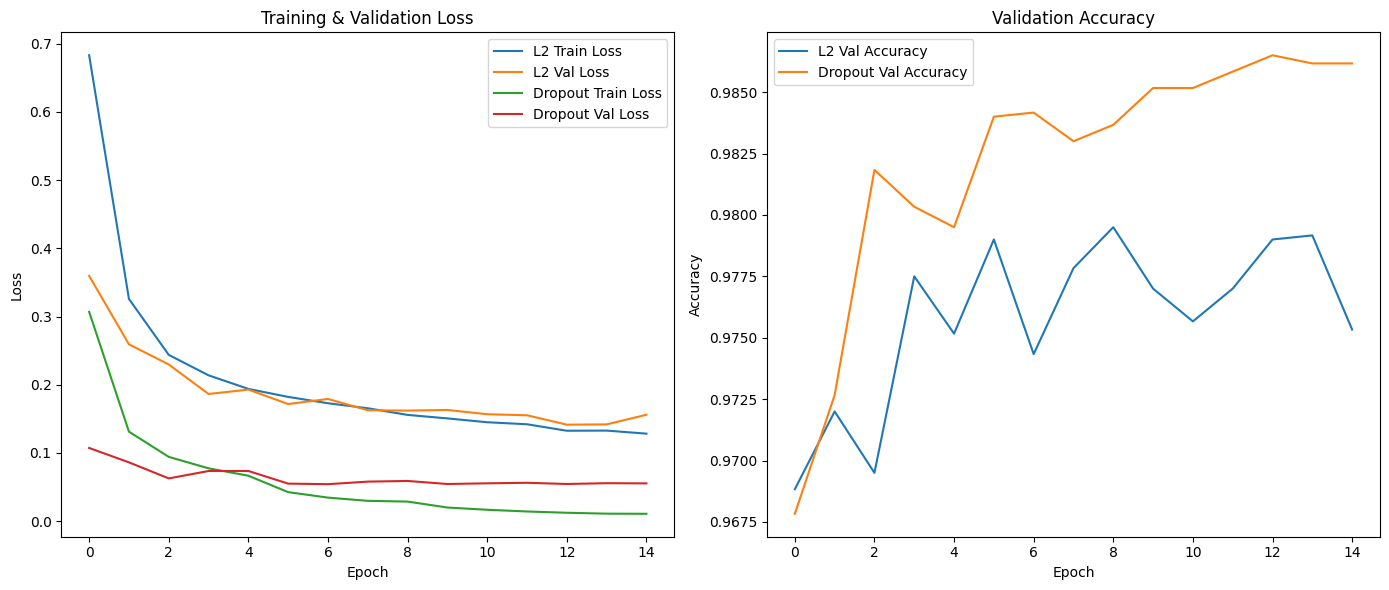

In [6]:
# Plotting Training & Validation Loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_l2.history['loss'], label='L2 Train Loss')
plt.plot(history_l2.history['val_loss'], label='L2 Val Loss')
plt.plot(history_dropout.history['loss'], label='Dropout Train Loss')
plt.plot(history_dropout.history['val_loss'], label='Dropout Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_l2.history['val_accuracy'], label='L2 Val Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Val Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Print Results
print(" Test Evaluation")
print("------------------")
print(f"L2 Regularization - Test Accuracy: {acc_l2:.4f}, Test Loss: {loss_l2:.4f}")
print(f"Dropout           - Test Accuracy: {acc_dropout:.4f}, Test Loss: {loss_dropout:.4f}")

 Test Evaluation
------------------
L2 Regularization - Test Accuracy: 0.9733, Test Loss: 0.1541
Dropout           - Test Accuracy: 0.9853, Test Loss: 0.0555


| **Aspect**              | **L2 Regularization**                     | **Dropout**                                        |
| ----------------------- | ----------------------------------------- | -------------------------------------------------- |
| **Training Loss**       | Smooth decline, a bit higher than dropout | Lower, but might fluctuate slightly                |
| **Validation Loss**     | Low, stable after some epochs             | Slightly better in reducing overfitting            |
| **Validation Accuracy** | Good, slower improvement                  | Often higher peak with good generalization         |
| **Test Accuracy**       | High (\~97–98%)                           | Very high (\~98%+)                                 |
| **Generalization**      | Works well for stability                  | Works better for aggressive overfitting prevention |
